### Functions loading

In [1]:
!pip cache purge

%load_ext autoreload
%autoreload 2

Files removed: 0


In [167]:
import json
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import ast
from models.models_true_data import *
from models.losses import *
from models.metric import *
import datetime
from utils.img_utils import draw_axis
%matplotlib inline
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import argparse
import tensorflow as tf
import cv2
import os
from utils.utils import resize_preserving_ar, detect, percentage_to_pixel, get_face_points, normalize_wrt_maximum_distance_point
from utils.img_utils import draw_key_points_pose, draw_axis
import numpy as np
import argparse
import pandas as pd
import cv2
import tensorflow as tf
from utils.utils import get_face_points, normalize_wrt_maximum_distance_point
from utils.img_utils import draw_key_points_pose, draw_axis
from utils.utils_tflite import initialize_interpreter, resize_preserving_ar, inference_interpreter, pose_from_det

### Extracted kpts reading

In [144]:
kpts_all_train_posenet = []
kpts_all_test_posenet = []
angles_all_train_posenet = []
angles_all_test_posenet = []
testing_participants = ["10", "14", "16", "20"]
kpts_path = r"kpts_extracted_posenet"
kpts_files = os.listdir(kpts_path)
for k in range(len(kpts_files)):
    if kpts_files[k][:2] not in testing_participants:

        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_train_posenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_train_posenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))

    else:
        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_test_posenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_test_posenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))
        



In [4]:
kpts_all_train_movenet = []
kpts_all_test_movenet = []
angles_all_train_movenet = []
angles_all_test_movenet = []
testing_participants = ["10", "14", "16", "20"]
kpts_path = r"kpts_extracted_movenet"
kpts_files = os.listdir(kpts_path)
for k in range(len(kpts_files)):
    if kpts_files[k][:2] not in testing_participants:

        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_train_movenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_train_movenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))

    else:
        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_test_movenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_test_movenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))
        



### Datasets creation

In [145]:
kpts_train_posenet, kpts_val_posenet, angles_train_posenet, angles_val_posenet = train_test_split(kpts_all_train_posenet, angles_all_train_posenet, test_size=0.2, random_state=42)


In [164]:
result_angles = tf.concat(angles_all_test_posenet, axis=0)

In [146]:
def convert_kpts_angles_to_dataset(kpts, angles):

    x = kpts[0]
    for i in range(1,len(kpts)):
        x = tf.concat([x, kpts[i]], 0)
        
    x = tf.expand_dims(
        x, axis = -1
    )

    y = np.array(angles)[:,0,:]
    # for i in range(1,len(x)):
    #     y = tf.concat([y, angles[i]], 0)



    dataset = tf.data.Dataset.from_tensor_slices(({'input': x},
    {
        'yaw': tf.expand_dims(y[:, 0], axis = -1),   # Access first column (yaw)
        'pitch': tf.expand_dims(y[:, 1], axis = -1), # Access second column (pitch)
        'roll': tf.expand_dims(y[:, 2], axis = -1)  # Access third column (roll)
    }
))
    return dataset

In [147]:
train_dataset_posenet = convert_kpts_angles_to_dataset(kpts_train_posenet, angles_train_posenet)
val_dataset_posenet = convert_kpts_angles_to_dataset(kpts_val_posenet, angles_val_posenet)
test_dataset_posenet = convert_kpts_angles_to_dataset(kpts_all_test_posenet, angles_all_test_posenet)

In [148]:
len(angles_all_test_posenet)

29851

In [149]:
train_dataset_posenet = train_dataset_posenet.shuffle(buffer_size=300, reshuffle_each_iteration=True)
BATCH_SIZE = 128
train_dataset_posenet = train_dataset_posenet.batch(BATCH_SIZE, drop_remainder=True)
val_dataset_posenet = val_dataset_posenet.batch(BATCH_SIZE, drop_remainder=True)
test_dataset_posenet= test_dataset_posenet.batch(BATCH_SIZE, drop_remainder=False)

In [150]:
def calculate_stats_in_dataset_from_kpts(data):
    all_kpts = data[0]
    for i in range(1,len(data)):
        all_kpts = tf.concat([all_kpts, data[i]], 0)
    all_kpts = np.array(all_kpts)
    
    new_data = all_kpts[:, [2, 5, 8, 11, 14]] #change. check alphapose keypoints labels
    mean = np.mean(new_data)
    var = np.std(new_data)
    return mean, var

In [10]:
current_time = datetime.datetime.now()
today = datetime.date.today()
d1 = '' + today.strftime("%d-%m-%Y") + '_' + str(current_time.hour) + '_' + str(current_time.minute)
folder_results = r"results/posenet_trained"

mean_uncertainty_in_dataset, std_uncertainty_in_dataset = calculate_stats_in_dataset_from_kpts(kpts_all_train_posenet)

print(mean_uncertainty_in_dataset, std_uncertainty_in_dataset)

log_dir = "results/posenet_trained/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping_callback = keras.callbacks.EarlyStopping(
                # Stop training when `val_loss` is no longer improving
                monitor="val_loss",
                # "no longer improving" being defined as "no better than 1e-2 less"
                min_delta=0.0001, # almost everythinh is an improvemente
                # "no longer improving" being further defined as "for at least 5 epochs"
                patience=5,
                verbose=1,
                restore_best_weights = False, # take the weights 5 epochs after best
        )

my_results = {}
my_results['yaw_MAE_hpe'] = []
my_results['pitch_MAE_hpe'] = []
my_results['roll_MAE_hpe'] = []

0.8333215 0.37268856


In [11]:
# hhp_net(mean=mean_uncertainty_in_dataset, std=std_uncertainty_in_dataset,  alpha=1)
posenet_head = hhp_net_all_points(mean_uncertainty_in_dataset, std_uncertainty_in_dataset, a = 15, alpha=1)

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\layers\core\lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
     
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=1000, # new
        decay_rate=0.5,
        staircase=True)


posenet_head.compile(
                optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),  # Optimizer
                # Loss function to minimize
                loss=[Mse_loss_beta_nll(), Mse_loss_beta_nll(),
                      Mse_loss_beta_nll()],
                # List of metrics to monitor
                # metrics=[keras.metrics.MeanSquaredError()],
                metrics={'yaw'  : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                         'pitch': [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                         'roll' : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()]},
                # metrics = {'yaw': keras.metrics.MeanSquaredError(), 'pitch': keras.metrics.MeanSquaredError(), 'roll': keras.metrics.MeanSquaredError()},
        )

#posenet_head.summary()


!! warning!!! The model outputs s but when we print Save_Uncertainty_deg(), it is sigma already!!!

In [13]:
for batch in train_dataset_posenet.take(1):
    inputs, targets = batch
    print("Inputs shape:", inputs['input'].shape)  # (batch_size, 15, 1)
    print("Yaw shape:", targets['yaw'].shape)     # (batch_size,)
    print("Pitch shape:", targets['pitch'].shape) # (batch_size,)
    print("Roll shape:", targets['roll'].shape)   # (batch_size,)
    print(inputs)
    print(targets)




Inputs shape: (128, 15, 1)
Yaw shape: (128, 1)
Pitch shape: (128, 1)
Roll shape: (128, 1)
{'input': <tf.Tensor: shape=(128, 15, 1), dtype=float32, numpy=
array([[[-0.1       ],
        [ 0.78571427],
        [ 1.        ],
        ...,
        [-0.9       ],
        [ 0.42857143],
        [ 1.        ]],

       [[-0.27450982],
        [ 0.6666667 ],
        [ 1.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.04166667],
        [ 1.        ],
        [ 1.        ],
        ...,
        [-1.        ],
        [ 0.16666667],
        [ 1.        ]],

       ...,

       [[-0.34920636],
        [ 0.09090909],
        [ 1.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.05263158],
        [ 1.        ],
        [ 1.        ],
        ...,
        [-1.        ],
        [-0.59090906],
        [ 1.        ]],

       [[-0.14035088],
        [ 0.6666667 ],
        [ 1.        ],

In [14]:
train_dataset_posenet

<_BatchDataset element_spec=({'input': TensorSpec(shape=(128, 15, 1), dtype=tf.float32, name=None)}, {'yaw': TensorSpec(shape=(128, 1), dtype=tf.float32, name=None), 'pitch': TensorSpec(shape=(128, 1), dtype=tf.float32, name=None), 'roll': TensorSpec(shape=(128, 1), dtype=tf.float32, name=None)})>

In [15]:
for sample_batch in train_dataset_posenet.take(1):
    posenet_head(sample_batch[0])  # Pass input data only


c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: input. Received: the structure of inputs={'input': '*'}
  warnings.warn(


In [21]:
EPOCHS = 300
history = posenet_head.fit(train_dataset_posenet, epochs=EPOCHS,
                               callbacks=[tensorboard_callback, early_stopping_callback], validation_data=val_dataset_posenet)


Epoch 1/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 83.9765 - pitch_MAE_hpe: 8.3372 - pitch_Save_UNC: 7.5446 - pitch_angle_accuracy: 0.8358 - pitch_loss: 35.8267 - roll_MAE_hpe: 16.2393 - roll_Save_UNC: 6.0524 - roll_angle_accuracy: 0.6508 - roll_loss: 29.5733 - yaw_MAE_hpe: 13.6583 - yaw_Save_UNC: 4.6520 - yaw_angle_accuracy: 0.6657 - yaw_loss: 18.5765 - val_loss: 76.8830 - val_pitch_MAE_hpe: 8.3789 - val_pitch_Save_UNC: 20.0000 - val_pitch_angle_accuracy: 0.8358 - val_pitch_loss: 35.9566 - val_roll_MAE_hpe: 18.6241 - val_roll_Save_UNC: 20.0000 - val_roll_angle_accuracy: 0.5812 - val_roll_loss: 23.4540 - val_yaw_MAE_hpe: 13.3922 - val_yaw_Save_UNC: 20.0000 - val_yaw_angle_accuracy: 0.6689 - val_yaw_loss: 17.4724
Epoch 2/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 76.3817 - pitch_MAE_hpe: 8.3760 - pitch_Save_UNC: 7.4344 - pitch_angle_accuracy: 0.8346 - pitch_loss: 35.2180 - roll_MAE_hpe: 18.5175 - roll_Save_UNC: 5.4733 - roll_angle_accuracy: 0.5801 - roll_loss: 23.802

In [17]:
EPOCHS = 300
history = posenet_head.fit(train_dataset_posenet, epochs=EPOCHS,
                               callbacks=[tensorboard_callback, early_stopping_callback], validation_data=val_dataset_posenet)


Epoch 1/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 83.0257 - pitch_MAE_hpe: 8.4161 - pitch_Save_UNC: 7.4226 - pitch_angle_accuracy: 0.8333 - pitch_loss: 35.1958 - roll_MAE_hpe: 16.1388 - roll_Save_UNC: 5.9374 - roll_angle_accuracy: 0.6507 - roll_loss: 28.8984 - yaw_MAE_hpe: 13.7855 - yaw_Save_UNC: 4.6836 - yaw_angle_accuracy: 0.6620 - yaw_loss: 18.9315 - val_loss: 74.6508 - val_pitch_MAE_hpe: 8.8575 - val_pitch_Save_UNC: 20.0000 - val_pitch_angle_accuracy: 0.8180 - val_pitch_loss: 33.9337 - val_roll_MAE_hpe: 18.2041 - val_roll_Save_UNC: 20.0000 - val_roll_angle_accuracy: 0.5849 - val_roll_loss: 23.2029 - val_yaw_MAE_hpe: 13.4983 - val_yaw_Save_UNC: 20.0000 - val_yaw_angle_accuracy: 0.6646 - val_yaw_loss: 17.5141
Epoch 2/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 70.6706 - pitch_MAE_hpe: 11.5985 - pitch_Save_UNC: 6.2682 - pitch_angle_accuracy: 0.7406 - pitch_loss: 29.9697 - roll_MAE_hpe: 18.4186 - roll_Save_UNC: 5.4480 - roll_angle_accuracy: 0.5765 - roll_loss: 23.63

In [152]:
test_history = posenet_head.evaluate(test_dataset_posenet, return_dict=True)

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57.2862 - pitch_MAE_hpe: 17.3073 - pitch_Save_UNC: 5.2659 - pitch_angle_accuracy: 0.5808 - pitch_loss: 22.9908 - roll_MAE_hpe: 19.0976 - roll_Save_UNC: 5.1230 - roll_angle_accuracy: 0.5568 - roll_loss: 18.4586 - yaw_MAE_hpe: 12.3765 - yaw_Save_UNC: 4.3109 - yaw_angle_accuracy: 0.6940 - yaw_loss: 15.8375


In [ ]:
test_history

{'loss': 56.45566940307617,
 'pitch_MAE_hpe': 17.395126342773438,
 'pitch_Save_UNC': 20.0,
 'pitch_angle_accuracy': 0.5935488343238831,
 'pitch_loss': 22.89132308959961,
 'roll_MAE_hpe': 18.56394386291504,
 'roll_Save_UNC': 20.0,
 'roll_angle_accuracy': 0.5777561664581299,
 'roll_loss': 18.61342430114746,
 'yaw_MAE_hpe': 11.562639236450195,
 'yaw_Save_UNC': 20.0,
 'yaw_angle_accuracy': 0.7197223901748657,
 'yaw_loss': 14.950921058654785}

In [153]:
test_prediction = posenet_head.predict(test_dataset_posenet)

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [154]:
test_prediction[0].shape

(29851, 2)

In [54]:
unc_pr_yaw = test_prediction[0][:,1]
unc_pr_pitch = test_prediction[1][:,1]
unc_pr_roll = test_prediction[2][:,1]

In [155]:
tf.sqrt(tf.exp(unc_pr_yaw))

<tf.Tensor: shape=(29824,), dtype=float32, numpy=
array([2.468348 , 2.468348 , 1.9882613, ..., 4.815262 , 4.54582  ,
       4.5206504], dtype=float32)>

In [55]:
print(tf.reduce_mean(tf.sqrt(tf.exp(unc_pr_yaw))))
print(tf.reduce_mean(tf.sqrt(tf.exp(unc_pr_pitch))))
print(tf.reduce_mean(tf.sqrt(tf.exp(unc_pr_roll))))

tf.Tensor(4.2617154, shape=(), dtype=float32)
tf.Tensor(5.223548, shape=(), dtype=float32)
tf.Tensor(5.0712605, shape=(), dtype=float32)


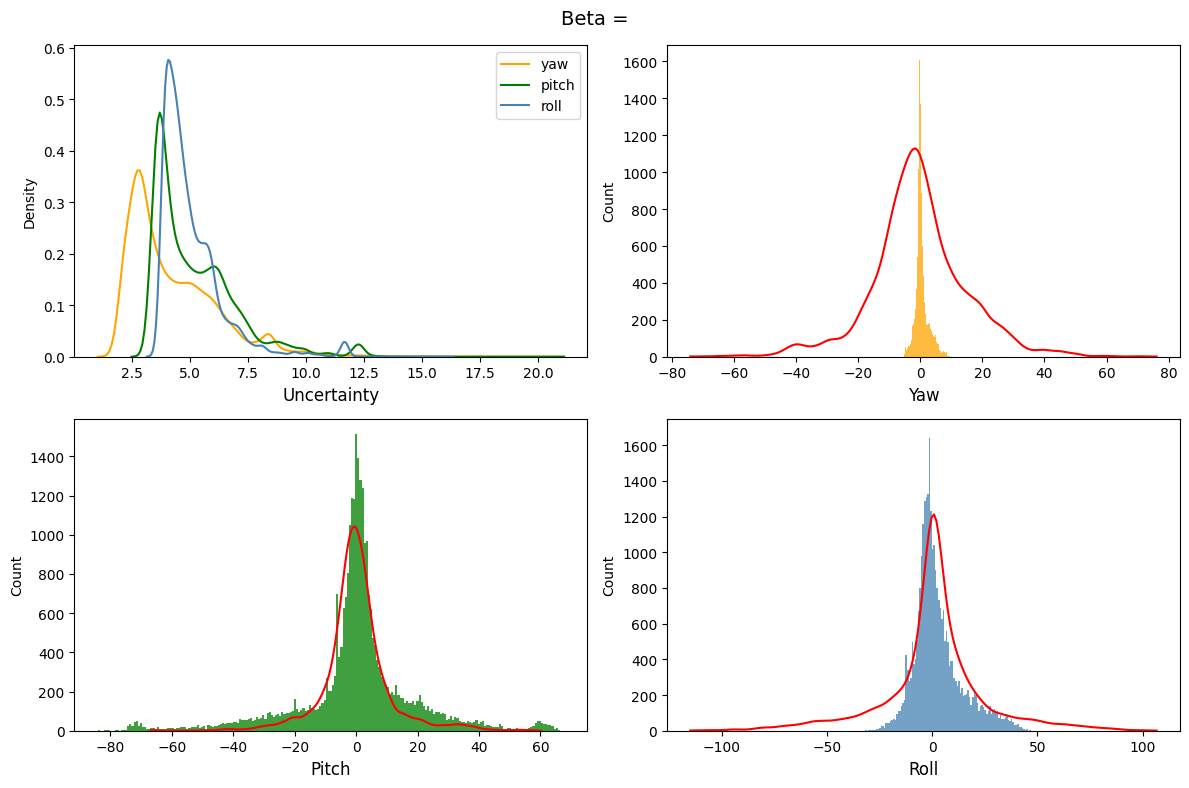

In [157]:




# Create a 2x2 grid of subplots using plt.subplot()
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Beta =', fontsize=14)

# First subplot: KDE plot - using the axes approach
ax1 = axes[0, 0]


sns.kdeplot(tf.sqrt(tf.exp(test_prediction[0][:,1])), color = 'orange', label = 'yaw', ax=ax1)
sns.kdeplot(tf.sqrt(tf.exp(test_prediction[1][:,1])), color = 'green', label = 'pitch', ax=ax1)
sns.kdeplot(tf.sqrt(tf.exp(test_prediction[2][:,1])), color = 'steelblue', label = 'roll', ax=ax1)
ax1.set_xlabel('Uncertainty', fontsize=12)
ax1.legend()

# Second subplot: Histogram
ax2 = axes[0, 1]
sns.histplot(test_prediction[0][:,0], color='orange', kde=False, linewidth=0, ax=ax2)
sns.histplot(result_angles[:,0], color='r', kde=True, alpha=0, element="poly", linewidth=0, ax=ax2)
ax2.set_xlabel('Yaw', fontsize=12)

# Third subplot: Histogram with KDE
ax3 = axes[1, 0]
sns.histplot(test_prediction[1][:,0], color='green', linewidth=0, ax=ax3)
sns.histplot(result_angles[:,1], color='r', kde=True, alpha=0, element="poly", linewidth=0, ax=ax3)
ax3.set_xlabel('Pitch', fontsize=12)

# Fourth subplot: Histogram with different bin size
ax4 = axes[1, 1]
sns.histplot(test_prediction[2][:,0], color='steelblue', kde=False, linewidth=0, ax=ax4)
sns.histplot(result_angles[:,2], color='r', kde=True, alpha=0, element="poly", linewidth=0, ax=ax4)
ax4.set_xlabel('Roll', fontsize=12)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.savefig('results/images/output_angles_distr_beta_.png')

In [159]:
def initialize_network(mean_uncertainty_in_dataset, std_uncertainty_in_dataset, train_dataset_posenet, beta):


        my_results = {}
        my_results['yaw_MAE_hpe'] = []
        my_results['pitch_MAE_hpe'] = []
        my_results['roll_MAE_hpe'] = []
        
        # hhp_net(mean=mean_uncertainty_in_dataset, std=std_uncertainty_in_dataset,  alpha=1)
        posenet_head = hhp_net_all_points(mean_uncertainty_in_dataset, std_uncertainty_in_dataset, a = 15, alpha=1)

         
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=0.001,
                decay_steps=1000, # new
                decay_rate=0.5,
                staircase=True)


        posenet_head.compile(
                        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),  # Optimizer
                        # Loss function to minimize
                        loss=[Mse_loss_beta_nll_adj(beta_coef=beta), Mse_loss_beta_nll_adj(beta_coef=beta),
                        Mse_loss_beta_nll_adj(beta_coef=beta)],
                        # List of metrics to monitor
                        # metrics=[keras.metrics.MeanSquaredError()],
                        metrics={'yaw'  : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                                'pitch': [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                                'roll' : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()]},
                        # metrics = {'yaw': keras.metrics.MeanSquaredError(), 'pitch': keras.metrics.MeanSquaredError(), 'roll': keras.metrics.MeanSquaredError()},
                )

        #posenet_head.summary()


        for sample_batch in train_dataset_posenet.take(1):
                posenet_head(sample_batch[0])  # Pass input data only
        
        return posenet_head




        


        

In [160]:
def train_network_beta(model,  train_dataset_posenet, val_dataset_posenet):
        
        current_time = datetime.datetime.now()
        today = datetime.date.today()
        d1 = '' + today.strftime("%d-%m-%Y") + '_' + str(current_time.hour) + '_' + str(current_time.minute)
        

        log_dir = "results/posenet_trained/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        early_stopping_callback = keras.callbacks.EarlyStopping(
                        # Stop training when `val_loss` is no longer improving
                        monitor="val_loss",
                        # "no longer improving" being defined as "no better than 1e-2 less"
                        min_delta=0.0001, # almost everythinh is an improvemente
                        # "no longer improving" being further defined as "for at least 5 epochs"
                        patience=5,
                        verbose=1,
                        restore_best_weights = False, # take the weights 5 epochs after best
                )
        
        
        EPOCHS = 300
        history = model.fit(train_dataset_posenet, epochs=EPOCHS,
                               callbacks=[tensorboard_callback, early_stopping_callback], validation_data=val_dataset_posenet)
        
        return model, history
        

In [163]:
def evaluate_beta(model, beta, test_dataset_posenet, result_path, result_angles):
        

        test_prediction = model.predict(test_dataset_posenet)

        # Create a 2x2 grid of subplots using plt.subplot()
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        fig.suptitle(f'Beta = {beta}', fontsize=14)

        # First subplot: KDE plot - using the axes approach
        ax1 = axes[0, 0]
        sns.kdeplot(tf.sqrt(tf.exp(test_prediction[0][:,1])), color = 'orange', label = 'yaw', ax=ax1)
        sns.kdeplot(tf.sqrt(tf.exp(test_prediction[1][:,1])), color = 'green', label = 'pitch', ax=ax1)
        sns.kdeplot(tf.sqrt(tf.exp(test_prediction[2][:,1])), color = 'steelblue', label = 'roll', ax=ax1)
        ax1.set_xlabel('Uncertainty', fontsize=12)
        ax1.legend()

        # Second subplot: Histogram
        ax2 = axes[0, 1]
        sns.histplot(test_prediction[0][:,0], color='orange', kde=False, linewidth=0, ax=ax2)
        sns.histplot(result_angles[:,0], color='r', kde=True, alpha=0, element="poly", linewidth=0, ax=ax2)
        ax2.set_xlabel('Yaw', fontsize=12)

        # Third subplot: Histogram with KDE
        ax3 = axes[1, 0]
        sns.histplot(test_prediction[1][:,0], color='green', linewidth=0, ax=ax3)
        sns.histplot(result_angles[:,1], color='r', kde=True, alpha=0, element="poly", linewidth=0, ax=ax3)
        ax3.set_xlabel('Pitch', fontsize=12)

        # Fourth subplot: Histogram with different bin size
        ax4 = axes[1, 1]
        sns.histplot(test_prediction[2][:,0], color='steelblue', kde=False, linewidth=0, ax=ax4)
        sns.histplot(result_angles[:,2], color='r', kde=True, alpha=0, element="poly", linewidth=0, ax=ax4)
        ax4.set_xlabel('Roll', fontsize=12)

        # Adjust layout
        plt.tight_layout()
        # Show the plot
        plt.savefig(f'{result_path}/images/output_angles_distr_beta_{beta}.png')

        return test_prediction
        

#### Testing functions

In [165]:
kpts_train_posenet, kpts_val_posenet, angles_train_posenet, angles_val_posenet = train_test_split(kpts_all_train_posenet, angles_all_train_posenet, test_size=0.2, random_state=42)

result_angles = tf.concat(angles_all_test_posenet, axis=0)


train_dataset_posenet = convert_kpts_angles_to_dataset(kpts_train_posenet, angles_train_posenet)
val_dataset_posenet = convert_kpts_angles_to_dataset(kpts_val_posenet, angles_val_posenet)
test_dataset_posenet = convert_kpts_angles_to_dataset(kpts_all_test_posenet, angles_all_test_posenet)

train_dataset_posenet = train_dataset_posenet.shuffle(buffer_size=300, reshuffle_each_iteration=True)
BATCH_SIZE = 128
train_dataset_posenet = train_dataset_posenet.batch(BATCH_SIZE, drop_remainder=True)
val_dataset_posenet = val_dataset_posenet.batch(BATCH_SIZE, drop_remainder=True)
test_dataset_posenet= test_dataset_posenet.batch(BATCH_SIZE, drop_remainder=False)


In [168]:
beta_06 = initialize_network(mean_uncertainty_in_dataset, std_uncertainty_in_dataset, train_dataset_posenet, beta = 0.6)

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: input. Received: the structure of inputs={'input': '*'}
  warnings.warn(


In [170]:
beta_06_trained, history_06 = train_network_beta(beta_06,  train_dataset_posenet, val_dataset_posenet)

Epoch 1/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 110.3230 - pitch_MAE_hpe: 11.3629 - pitch_Save_UNC: 5.4013 - pitch_angle_accuracy: 0.7502 - pitch_loss: 46.4021 - roll_MAE_hpe: 16.6946 - roll_Save_UNC: 4.9594 - roll_angle_accuracy: 0.6324 - roll_loss: 39.3908 - yaw_MAE_hpe: 13.8803 - yaw_Save_UNC: 3.9657 - yaw_angle_accuracy: 0.6600 - yaw_loss: 24.5301 - val_loss: 89.5928 - val_pitch_MAE_hpe: 16.8610 - val_pitch_Save_UNC: 20.0000 - val_pitch_angle_accuracy: 0.6194 - val_pitch_loss: 35.0423 - val_roll_MAE_hpe: 18.8158 - val_roll_Save_UNC: 20.0000 - val_roll_angle_accuracy: 0.5691 - val_roll_loss: 31.2709 - val_yaw_MAE_hpe: 13.5230 - val_yaw_Save_UNC: 20.0000 - val_yaw_angle_accuracy: 0.6661 - val_yaw_loss: 23.2796
Epoch 2/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 89.5618 - pitch_MAE_hpe: 16.7350 - pitch_Save_UNC: 4.8612 - pitch_angle_accuracy: 0.6245 - pitch_loss: 34.3361 - roll_MAE_hpe: 18.7682 - roll_Save_UNC: 4.6595 - roll_angle_accuracy: 0.5712 - roll_loss: 32

 18/234 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: input. Received: the structure of inputs={'input': '*'}
  warnings.warn(


234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


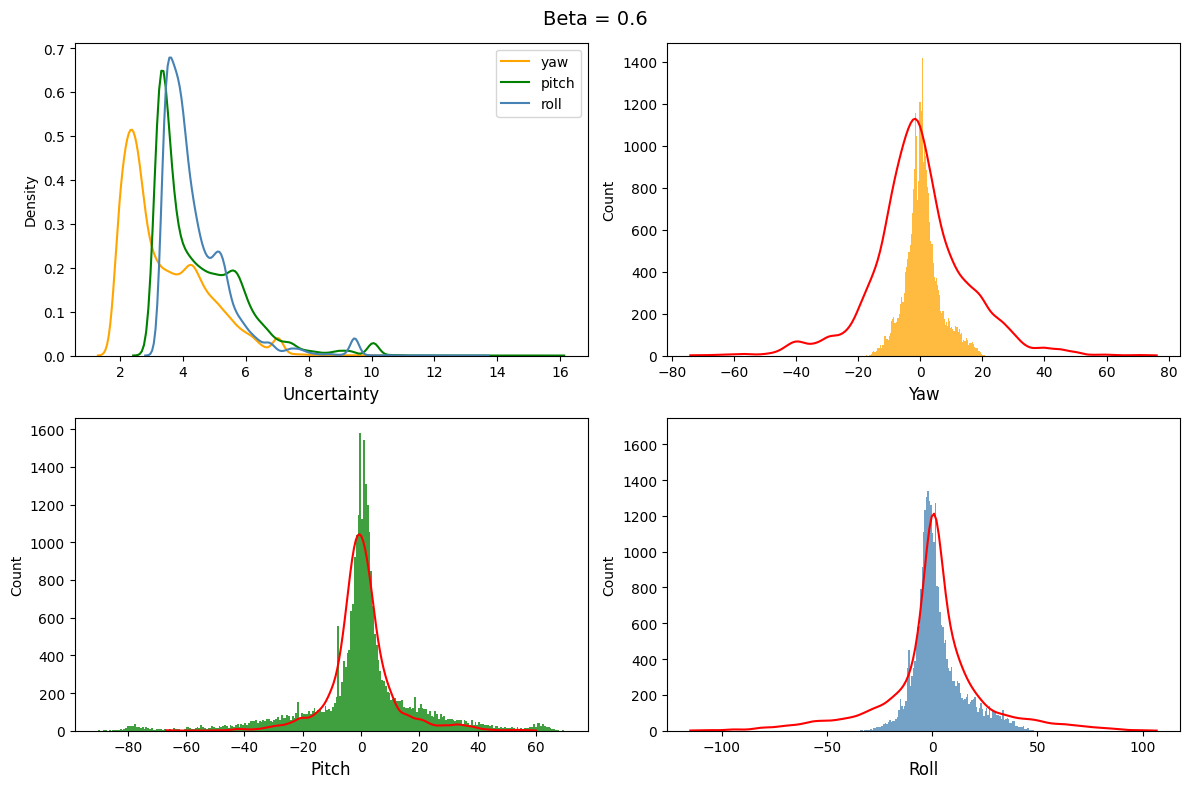

In [172]:
predictions_06 = evaluate_beta(beta_06_trained, 0.6, test_dataset_posenet,  'results', result_angles)

In [249]:
yaw_mae

[10.089751,
 11.838145,
 12.44907,
 15.454448,
 15.906142,
 21.707031,
 21.631395,
 21.693869,
 20.601076,
 16.300392]

In [257]:
def make_call_hist(unc, mae, num_bins, name_type, beta_type, result_path):

    plt.clf()
    
    unc = np.array(unc)
    mae = np.array(mae)
    _, edges = np.histogram(unc, bins = num_bins)
    mae_per_bin = []
    unc_per_bin = []
    for i in range(num_bins):
        unc_in_bin = []
        mae_in_bin = []
        start_bin = edges[i]
        end_bin = edges[i+1]
        for j in range(unc.shape[0]):
            if (unc[j] >= start_bin) and (unc[j] < end_bin):
                unc_in_bin.append(unc[j])
                mae_in_bin.append(mae[j])
        mae_per_bin.append(np.mean(mae_in_bin))
        unc_per_bin.append(np.mean(unc_in_bin))

    edges = list(edges)
    df1 = pd.DataFrame({
        'value': unc_per_bin,  # Use bin centers or edges
        'frequency': mae_per_bin,
        'Average': 'MAE'  # Label for the first dataset
    })

    # Create a DataFrame for the second histogram
    df2 = pd.DataFrame({
        'value': unc_per_bin,  # Use bin centers or edges
        'frequency': unc_per_bin,
        'Average': 'Uncertainty'  # Label for the second dataset
    })

    # Combine the two DataFrames
    df = pd.concat([df2, df1])

    # Create the plot using seaborn
    plt.figure(figsize=(10, 10))
    sns.histplot(
        data=df,
        x='value',  # Bin edges or centers
        weights='frequency',  # Use frequency as weights
        bins= edges,  # Specify bin edges
        hue='Average',  # Differentiate by dataset
        multiple='layer',  # Overlay the histograms
        palette=['green', 'orange'],  # Colors for the histograms
        alpha=0.3,  # Transparency
        edgecolor='black'  # Add edge color for clarity
    )

    # Add labels and title
    plt.xlabel('Uncertainty', fontsize = 12)
    plt.ylabel('Value', fontsize = 12)
    plt.title(f'{name_type}', fontsize = 12)
    plt.savefig(f"{result_path}/callibration_{name_type}_beta_{beta_type}.png")

    
    return mae_per_bin, unc_per_bin, edges



In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def make_call_hist(unc, mae, num_bins, name_type, beta_type, result_path):
    # Clear the current figure to avoid overlap
    plt.clf()

    unc = np.array(unc)
    mae = np.array(mae)
    _, edges = np.histogram(unc, bins=num_bins)
    mae_per_bin = []
    unc_per_bin = []
    edges = list(edges)
    edges[-1] = edges[-1] + 0.0001
    for i in range(num_bins):
        unc_in_bin = []
        mae_in_bin = []
        start_bin = edges[i]
        end_bin = edges[i + 1]
        for j in range(unc.shape[0]):
            if (unc[j] >= start_bin) and (unc[j] < end_bin):
                unc_in_bin.append(unc[j])
                mae_in_bin.append(mae[j])
        if len(mae_in_bin) > 0:
            mae_per_bin.append(np.mean(mae_in_bin))
            unc_per_bin.append(np.mean(unc_in_bin))
        else:
            mae_per_bin.append(0)  # Or use 0 or another default value
            unc_per_bin.append(0)


    

    # Create DataFrames with unique indices
    df1 = pd.DataFrame({
        'value': unc_per_bin,  # Use bin centers or edges
        'frequency': mae_per_bin,
        'Average': 'MAE'  # Label for the first dataset
    }, index=range(len(unc_per_bin)))  # Add unique index

    df2 = pd.DataFrame({
        'value': unc_per_bin,  # Use bin centers or edges
        'frequency': unc_per_bin,
        'Average': 'Uncertainty'  # Label for the second dataset
    }, index=range(len(unc_per_bin)))  # Add unique index

    # Combine the two DataFrames
    df = pd.concat([df2, df1], ignore_index=True)  # Use ignore_index to avoid duplicate indices

    # Create the plot using seaborn
    plt.figure(figsize=(10, 10))
    sns.histplot(
        data=df,
        x='value',  # Bin edges or centers
        weights='frequency',  # Use frequency as weights
        bins=edges,  # Specify bin edges
        hue='Average',  # Differentiate by dataset
        multiple='layer',  # Overlay the histograms
        palette=['green', 'orange'],  # Colors for the histograms
        alpha=0.3,  # Transparency
        edgecolor='black'  # Add edge color for clarity
    )

    # Add labels and title
    plt.xlabel('Uncertainty', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title(f'{name_type}', fontsize=12)
    plt.savefig(f"{result_path}/callibration_{name_type}_beta_{beta_type}.png")

    return mae_per_bin, unc_per_bin, edges

In [275]:
def calculate_predictions_res(predictions, gt, beta, result_path):
    yaw_mae = tf.abs(predictions[0][:,0] - gt[:,0])
    pitch_mae = tf.abs(predictions[1][:,0] - gt[:,1])
    roll_mae = tf.abs(predictions[2][:,0] - gt[:,2])

    unc_yaw_deg = (tf.sqrt(tf.exp(predictions[0][:,1])))
    unc_pitch_deg = (tf.sqrt(tf.exp(predictions[1][:,1])))
    unc_roll_deg = (tf.sqrt(tf.exp(predictions[2][:,1])))



    results = {
        "mean_yaw_mae": float(np.mean(yaw_mae)),
        "mean_pitch_mae": float(np.mean(pitch_mae)),
        "mean_roll_mae": float(np.mean(roll_mae)),
        "mean_unc_yaw_deg": float(np.mean(unc_yaw_deg)),
        "mean_unc_pitch_deg": float(np.mean(unc_pitch_deg)),
        "mean_unc_roll_deg": float(np.mean(unc_roll_deg))
    }

    # Write the results to a JSON file
    with open(f'{result_path}/mae_unc_beta_{beta}.json', 'w') as json_file:
        json.dump(results, json_file, indent=4)


    make_call_hist(unc_yaw_deg, yaw_mae, 10, "Yaw", beta, result_path)
    make_call_hist(unc_pitch_deg, pitch_mae, 10, "Pitch", beta, result_path)
    make_call_hist(unc_roll_deg, pitch_mae,  10, "Roll", beta, result_path)


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

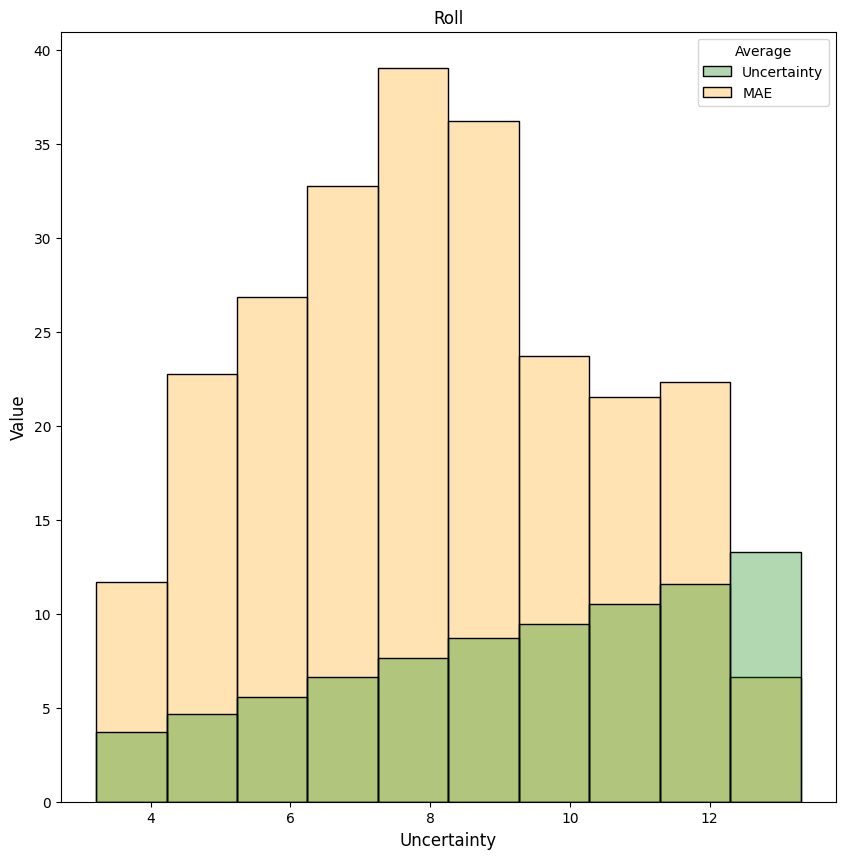

In [276]:
calculate_predictions_res(predictions_06, result_angles, 0.6,"results/beta_mae" )